In [1]:
# read csv 

import pandas as pd

data = pd.read_csv('./data/risk-testing-org0.8-pout0.005_20260125_230618_results.csv')

print(data.columns)
import seaborn as sns

data.head()["param_p_out"]

Index(['combo_id', 'trial_id', 'seed', 'param_n_departments',
       'param_agents_per_dept', 'param_seed_size', 'param_outreach_energy',
       'param_broadcast_energy', 'param_broadcast_reach_ratio', 'param_beta',
       'param_delta', 'param_omega', 'param_persistence_threshold',
       'param_p_in', 'param_p_out', 'param_mobilizing_threshold',
       'param_organizer_potential_ratio', 'param_alpha',
       'param_contagion_power', 'tick', 'total_energy', 'mean_energy',
       'energy_gradient', 'energy_from_outreach', 'energy_from_contagion',
       'energy_from_decay', 'mobilized_count', 'organizer_count',
       'passive_count', 'dsi', 'lwr', 'clustering_coefficient',
       'global_efficiency', 'reach', 'stop_test_active'],
      dtype='object')


0    0.005
1    0.005
2    0.005
3    0.005
4    0.005
Name: param_p_out, dtype: float64

In [ ]:
data.head()["param_delta"]

0    0.03
1    0.03
2    0.03
3    0.03
4    0.03
Name: param_delta, dtype: float64

# General comparison between strategies

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

3.0_Difusion vs. 3.0_Organizacion: Mann-Whitney-Wilcoxon test two-sided, P_val:2.640e-07 U_stat=3.407e+04
1.0_Difusion vs. 1.0_Organizacion: Mann-Whitney-Wilcoxon test two-sided, P_val:2.238e-24 U_stat=2.337e+04
5.0_Difusion vs. 5.0_Organizacion: Mann-Whitney-Wilcoxon test two-sided, P_val:2.124e-14 U_stat=2.877e+04


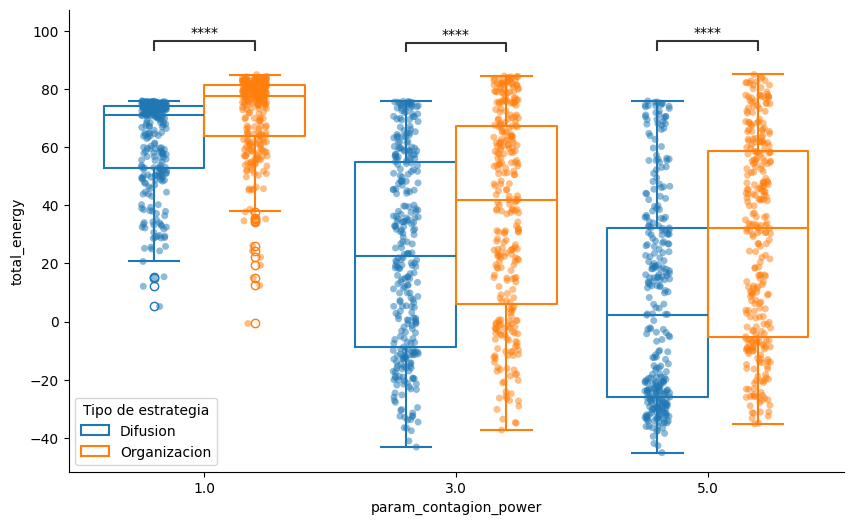

In [2]:
from statannotations.Annotator import Annotator
from matplotlib import pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

data["alpha"] = ["Organizacion" if alpha == 1.0 else "Difusion" for alpha in data["param_alpha"]]
data_ticks = data[data["tick"].isin([300])]

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=data_ticks, x="param_contagion_power", y="total_energy", hue="alpha", dodge=True, fill=False, ax=ax, )
sns.stripplot(data=data_ticks, x="param_contagion_power", y="total_energy", hue="alpha", dodge=True, alpha=0.5, ax=ax)

# Define pairs to compare (Difusion vs Organizacion for each contagion_power level)
pairs = [
    ((1.0, "Difusion"), (1.0, "Organizacion")),
    ((3.0, "Difusion"), (3.0, "Organizacion")),
    ((5.0, "Difusion"), (5.0, "Organizacion"))
]

annotator = Annotator(ax, pairs, data=data_ticks, x="param_contagion_power", y="total_energy", hue="alpha")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

sns.despine()
# remove legends
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:2], labels[0:2], title='Tipo de estrategia')

# save in figures as svg
fig.savefig('./figures/energy_comparison_contagion_power.svg', format='svg')

# save 

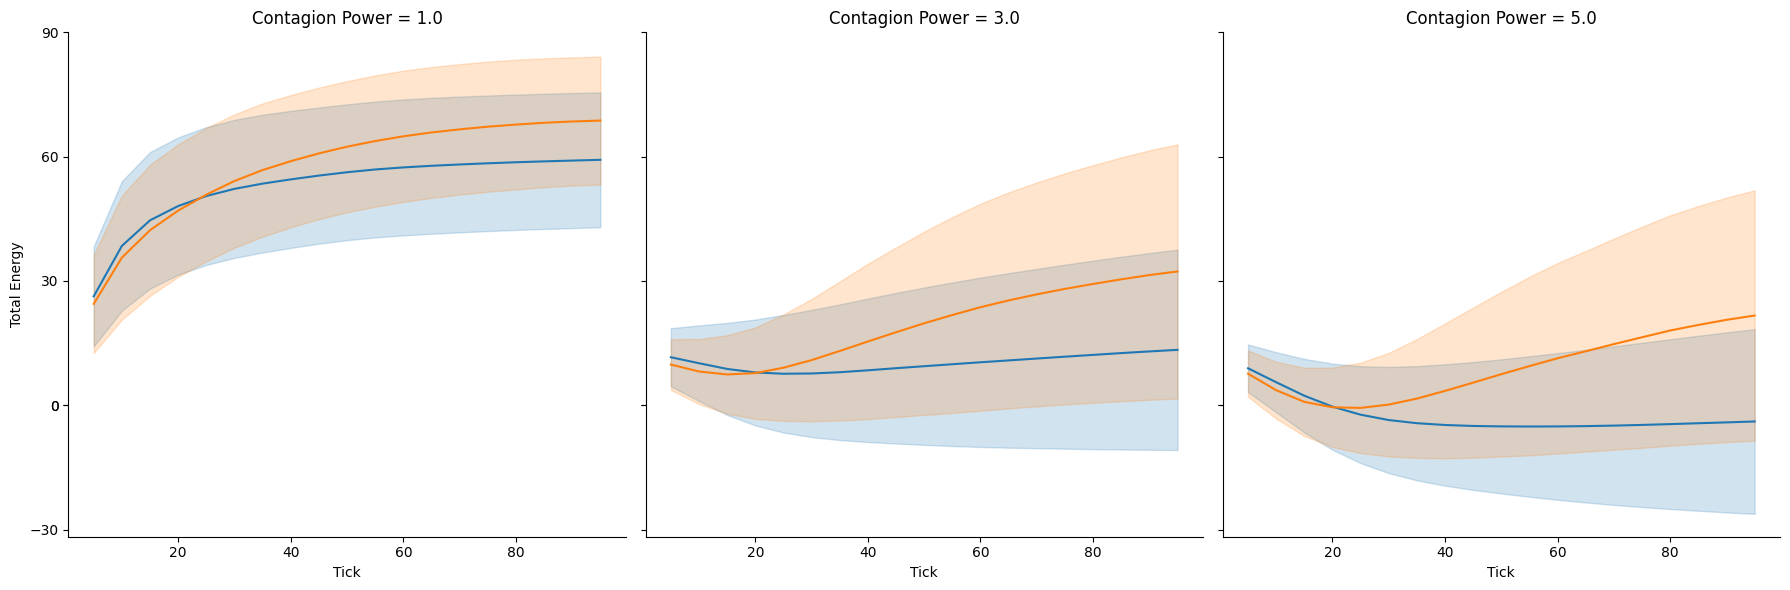

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

contagion_powers = [1.0, 3.0, 5.0]

for idx, cp in enumerate(contagion_powers):
    data_filtered = data[data["param_contagion_power"] == cp]
    data_filtered = data_filtered[data_filtered["tick"].isin(range(0, 100, 5))]
    
    sns.lineplot(data=data_filtered, x="tick", y="total_energy", hue="alpha", ax=axes[idx], errorbar='sd')
    axes[idx].set_title(f'Contagion Power = {cp}')
    axes[idx].set_xlabel('Tick')
    axes[idx].set_ylabel('Total Energy')
    axes[idx].legend().remove()
    axes[idx].set_yticks(list(range(-30,100,30))+[0])

    sns.despine()
plt.tight_layout()
fig.savefig('./figures/energy_comparison_lineplot.svg', format='svg')


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

3.0_Difusion vs. 3.0_Organizacion: Mann-Whitney-Wilcoxon test two-sided, P_val:2.640e-07 U_stat=3.407e+04
1.0_Difusion vs. 1.0_Organizacion: Mann-Whitney-Wilcoxon test two-sided, P_val:2.238e-24 U_stat=2.337e+04
5.0_Difusion vs. 5.0_Organizacion: Mann-Whitney-Wilcoxon test two-sided, P_val:2.124e-14 U_stat=2.877e+04


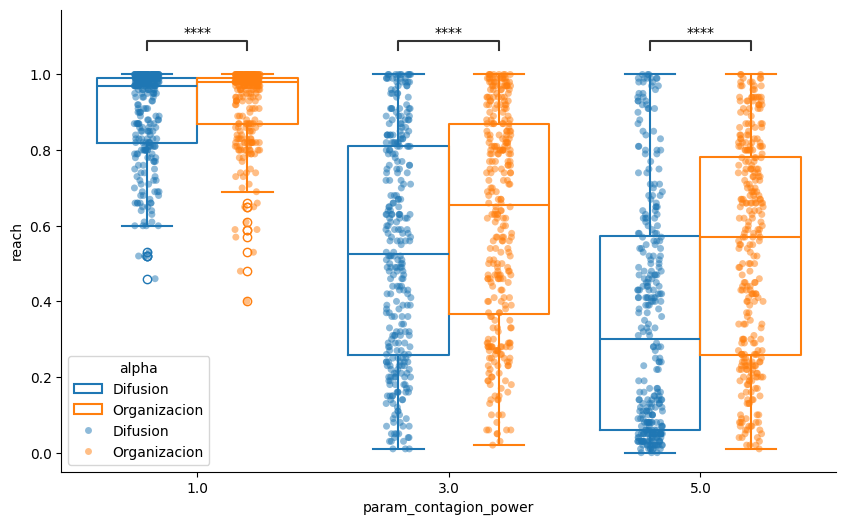

In [ ]:

data["alpha"] = ["Organizacion" if alpha == 1.0 else "Difusion" for alpha in data["param_alpha"]]
data_ticks = data[data["tick"].isin([300])]
#data_ticks_risk_medium = data_ticks[data_ticks["param_contagion_power"]==3.0]
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(ax=ax, data=data_ticks, x="param_contagion_power", y="reach", hue="alpha", dodge=True,fill=False)
sns.stripplot(ax=ax, data=data_ticks, x="param_contagion_power", y="reach", hue="alpha", dodge=True,alpha=0.5)
# Define pairs to compare (Difusion vs Organizacion for each contagion_power level)
pairs = [
    ((1.0, "Difusion"), (1.0, "Organizacion")),
    ((3.0, "Difusion"), (3.0, "Organizacion")),
    ((5.0, "Difusion"), (5.0, "Organizacion"))
]

annotator = Annotator(ax, pairs, data=data_ticks, x="param_contagion_power", y="total_energy", hue="alpha")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

sns.despine()
# remove legends
handles, labels = ax.get_legend_handles_labels()

sns.despine()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

3.0_Difusion vs. 3.0_Organizacion: Mann-Whitney-Wilcoxon test two-sided, P_val:2.640e-07 U_stat=3.407e+04
1.0_Difusion vs. 1.0_Organizacion: Mann-Whitney-Wilcoxon test two-sided, P_val:2.238e-24 U_stat=2.337e+04
5.0_Difusion vs. 5.0_Organizacion: Mann-Whitney-Wilcoxon test two-sided, P_val:2.124e-14 U_stat=2.877e+04


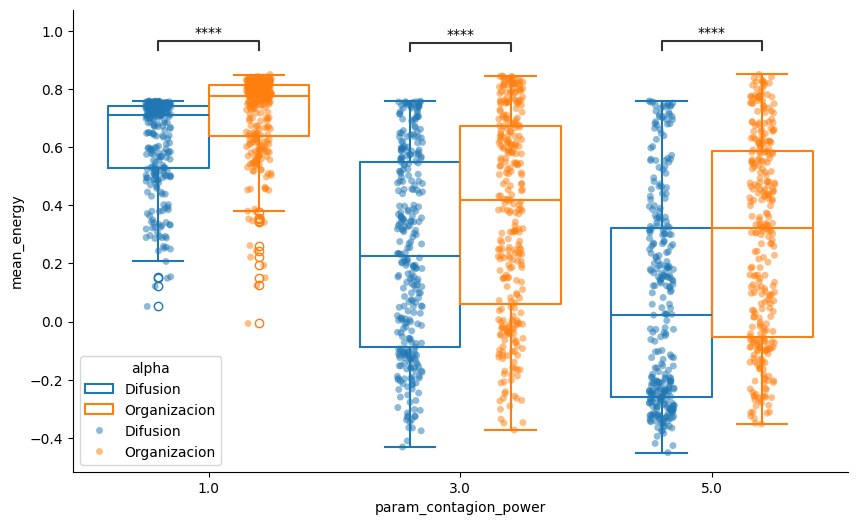

In [ ]:

data["alpha"] = ["Organizacion" if alpha == 1.0 else "Difusion" for alpha in data["param_alpha"]]
data_ticks = data[data["tick"].isin([300])]
#data_ticks_risk_medium = data_ticks[data_ticks["param_contagion_power"]==3.0]
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(ax=ax,data=data_ticks, x="param_contagion_power", y="mean_energy", hue="alpha", dodge=True,fill=False)
sns.stripplot(ax=ax,data=data_ticks, x="param_contagion_power", y="mean_energy", hue="alpha", dodge=True,alpha=0.5)
# Define pairs to compare (Difusion vs Organizacion for each contagion_power level)
pairs = [
    ((1.0, "Difusion"), (1.0, "Organizacion")),
    ((3.0, "Difusion"), (3.0, "Organizacion")),
    ((5.0, "Difusion"), (5.0, "Organizacion"))
]

annotator = Annotator(ax, pairs, data=data_ticks, x="param_contagion_power", y="mean_energy", hue="alpha")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()
# remove legends
handles, labels = ax.get_legend_handles_labels()

sns.despine()

plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

3.0_Difusion vs. 3.0_Organizacion: Mann-Whitney-Wilcoxon test two-sided, P_val:1.136e-75 U_stat=5.918e+03
1.0_Difusion vs. 1.0_Organizacion: Mann-Whitney-Wilcoxon test two-sided, P_val:5.222e-84 U_stat=3.769e+03
5.0_Difusion vs. 5.0_Organizacion: Mann-Whitney-Wilcoxon test two-sided, P_val:1.314e-66 U_stat=8.396e+03


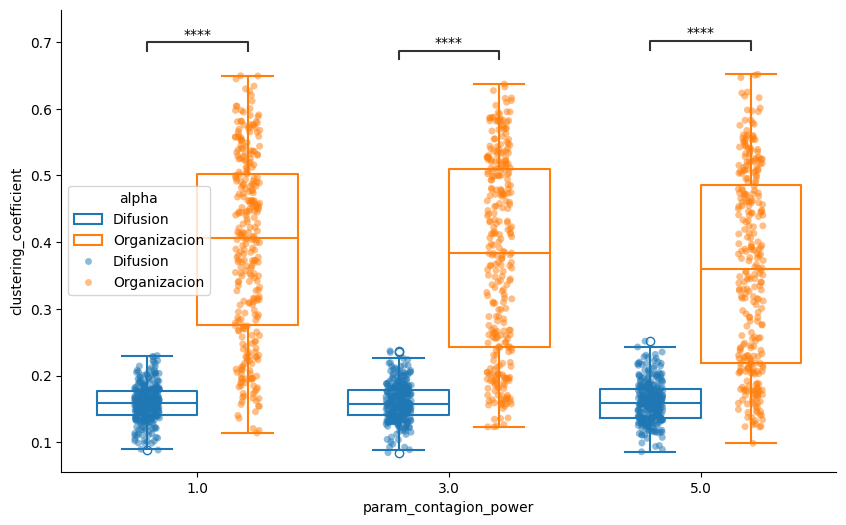

In [ ]:
data["alpha"] = ["Organizacion" if alpha == 1.0 else "Difusion" for alpha in data["param_alpha"]]
data_ticks = data[data["tick"].isin([300])]
#data_ticks_risk_medium = data_ticks[data_ticks["param_contagion_power"]==3.0]
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(ax=ax,data=data_ticks, x="param_contagion_power", y="clustering_coefficient", hue="alpha", dodge=True,fill=False)
sns.stripplot(ax=ax,data=data_ticks, x="param_contagion_power", y="clustering_coefficient", hue="alpha", dodge=True,alpha=0.5)
# Define pairs to compare (Difusion vs Organizacion for each contagion_power level)
pairs = [
    ((1.0, "Difusion"), (1.0, "Organizacion")),
    ((3.0, "Difusion"), (3.0, "Organizacion")),
    ((5.0, "Difusion"), (5.0, "Organizacion"))
]

annotator = Annotator(ax, pairs, data=data_ticks, x="param_contagion_power", y="clustering_coefficient", hue="alpha")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()
# remove legends
handles, labels = ax.get_legend_handles_labels()

sns.despine()

plt.show()

In [3]:
import numpy as np
data_tick_300 = data[data["tick"] == 300].copy()

# compute the mean total energy by seed
data_tick_300_mean = data_tick_300.groupby(["seed"])["total_energy"].mean()


data_sorted = pd.DataFrame(data_tick_300_mean.sort_values())

deciles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

data_sorted_deciles = data_sorted.iloc[[int(len(data_sorted) * d) - 1 for d in deciles]]
data_sorted_deciles["decile"] = deciles
data_sorted_deciles

/tmp/ipykernel_3370233/1017881013.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sorted_deciles["decile"] = deciles


,total_energy,decile
seed,,
2218,-20.558623,0.1
4184,-3.332891,0.2
1198,16.723299,0.3
5067,33.151264,0.4
202,48.707800,0.5
1148,58.829701,0.6
5099,68.659083,0.7
2283,74.334383,0.8
3138,78.635813,0.9


In [4]:
# Get the tick 300 data
data_tick_300 = data[data["tick"] == 300].copy()

# For each combo_id, get the trial_ids corresponding to each decile
decile_trials = []

for combo in data_tick_300['combo_id'].unique():
    combo_data = data_tick_300[data_tick_300['combo_id'] == combo].copy()
    combo_data = combo_data.sort_values('total_energy')
    
    # Calculate decile positions
    n = len(combo_data)
    deciles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    decile_positions = [int(n * d) - 1 for d in deciles]

    # get trial_id for each decile
    for i, pos in enumerate(decile_positions):
        trial_id = combo_data.iloc[pos]['trial_id']
        decile_trials.append({'trial_id': trial_id, 'decile': deciles[i], "combo_id": combo})


# select data for those trial_id, combo_id and add decile column
data_ticks_deciles = pd.DataFrame()
for dt in decile_trials:
    trial_data = data[(data['trial_id'] == dt['trial_id']) & (data['combo_id'] == dt['combo_id'])].copy()
    trial_data['decile'] = float(dt['decile'])
    data_ticks_deciles = pd.concat([data_ticks_deciles, trial_data], ignore_index=True)

In [5]:
data_ticks_deciles_05 = data_ticks_deciles[data_ticks_deciles["decile"] == 0.5]

# Group by param_contagion_power and alpha, then get unique seeds
data_param_1 = data_ticks_deciles_05.groupby(['param_contagion_power', 'alpha'])['trial_id'].unique().reset_index()
print(data_param_1)

   param_contagion_power         alpha trial_id
0                    1.0      Difusion    [184]
1                    1.0  Organizacion     [16]
2                    3.0      Difusion     [51]
3                    3.0  Organizacion    [211]
4                    5.0      Difusion    [224]
5                    5.0  Organizacion    [171]


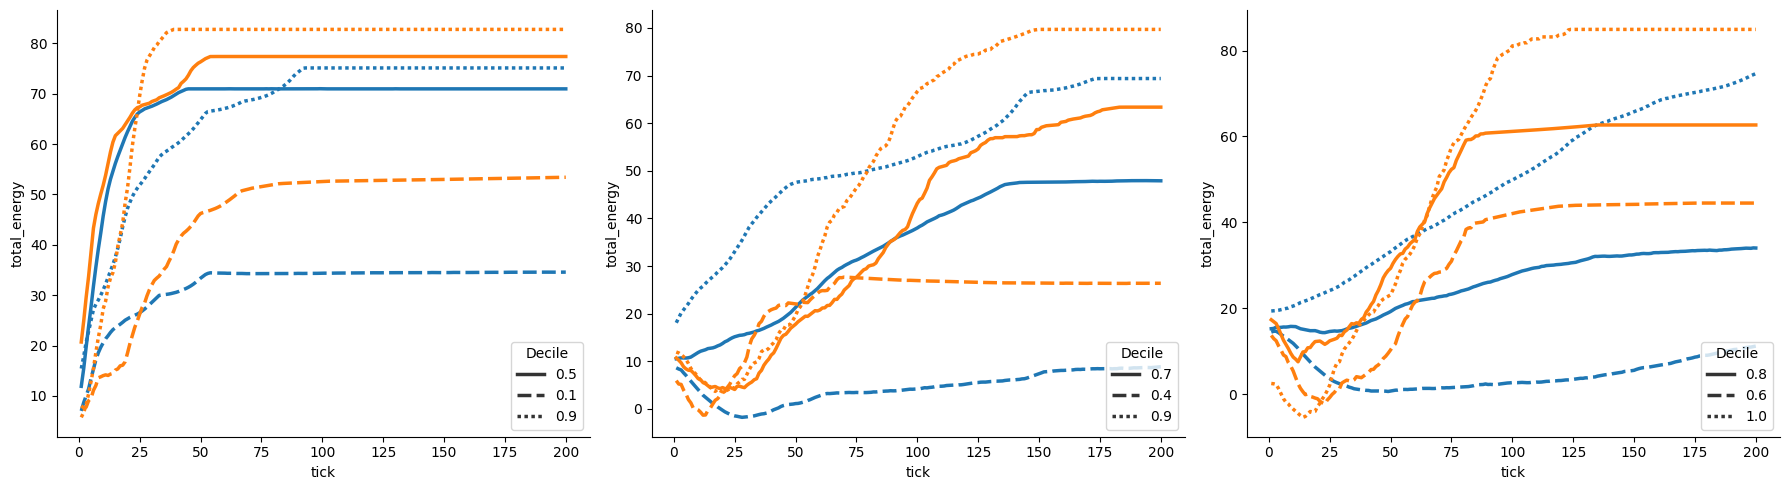

In [ ]:
data_ticks_deciles_alpha_3 = data_ticks_deciles[data_ticks_deciles["param_contagion_power"] == 1.0]
# Create subplots for all three contagion power levels
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

contagion_powers = [1.0, 3.0, 5.0]

deciles =[[
        0.1,
        0.5,
        0.9
    ],[
        0.4,
        0.7,
        0.9
    ],[0.6,
        0.8,
        1.0
    ]
]

for idx, contagion_power in enumerate(contagion_powers):
    data_filtered = data_ticks_deciles[data_ticks_deciles["param_contagion_power"] == contagion_power]
    data_filtered = data_filtered[data_filtered["tick"] <= 200.0]
    data_plot = data_filtered[data_filtered["decile"].isin(deciles[idx])]
    
    sns.lineplot(
        data=data_plot,
        x="tick",
        y="total_energy",
        style="decile",
        hue="param_alpha",
        linewidth=2.5,
        style_order=[deciles[idx][1],deciles[idx][0], deciles[idx][2]],
        ax=axes[idx]
    )
    
    axes[idx].set_title(f'')
    handles, labels = axes[idx].get_legend_handles_labels()
    axes[idx].legend(handles[4:], labels[4:], title='Decile', loc='lower right')
    
sns.despine()
plt.tight_layout()
plt.show()
fig.savefig('./figures/energy_comparison_deciles.svg', format='svg')


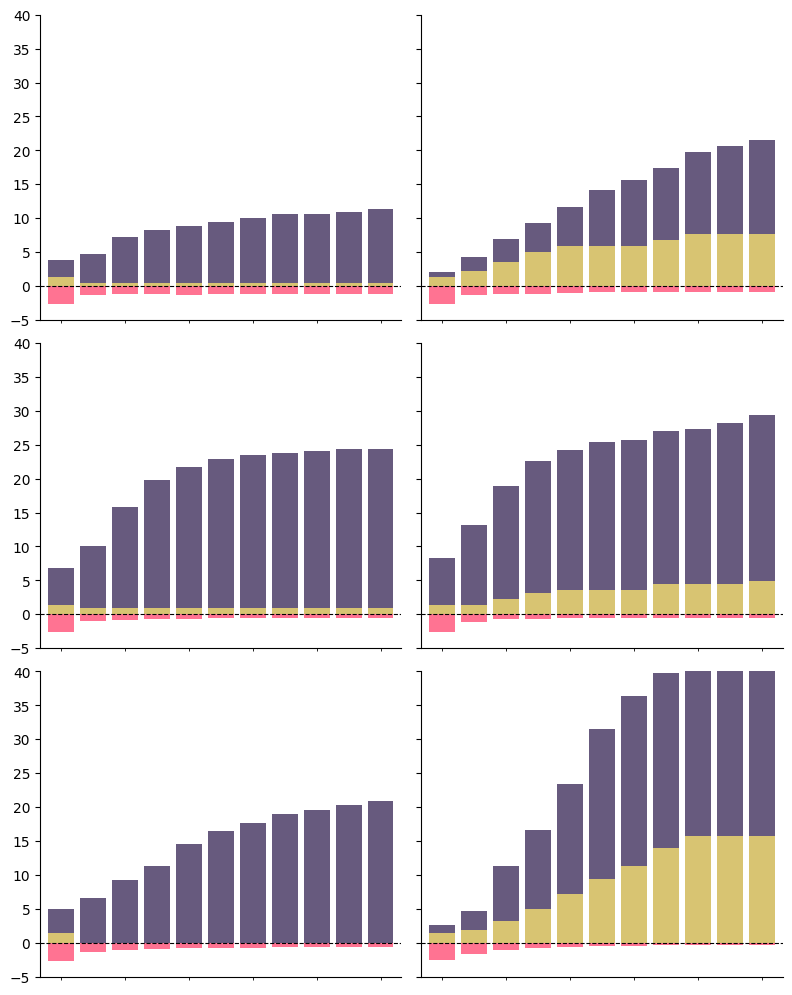

In [6]:
# Create subplots: 3 contagion powers x 2 alpha strategies
from matplotlib import pyplot as plt    

fig, axes = plt.subplots(3, 2, figsize=(8, 10), sharey=True,sharex=True)

contagion_powers = [1.0, 3.0, 5.0]

deciles =[[
        0.1,
        0.5,
        0.9
    ],[
        0.4,
        0.7,
        0.9
    ],[0.6,
        0.8,
        1.0
    ]
]
deciles_to_plot = deciles[0]
alpha_strategies = ['Difusion', 'Organizacion']
# Filter data for 0.7 decile and ticks
data_ticks_deciles_7 = data_ticks_deciles[
    (data_ticks_deciles["param_contagion_power"] == 1.0) & 
    ((((data_ticks_deciles["tick"] % 5 == 0) | (data_ticks_deciles["tick"] == 1)) & (data_ticks_deciles["tick"] <= 50)))
]

palette_energy = {
    'energy_from_contagion': '#261447',  # blue
    'energy_from_outreach': '#C8AB37',   # orange
    'energy_from_decay': '#FF3864'       # green
}

energy_long = pd.melt(
    data_ticks_deciles_7,
    id_vars=['tick', 'decile', 'alpha'],
    value_vars=['energy_from_contagion', 'energy_from_outreach', 'energy_from_decay'],
    var_name='energy_source',
    value_name='energy_value'
)

for col_idx, cp in enumerate(deciles_to_plot):
    for row_idx, alpha_val in enumerate(alpha_strategies):
        ax = axes[col_idx, row_idx]
        
        # Filter data for this combination
        data_filtered = energy_long[
            (energy_long['decile'] == cp) & 
            (energy_long['alpha'] == alpha_val)
        ]
        
        # Pivot to get energy sources as columns for stacking
        data_pivot = data_filtered.pivot_table(
            index='tick', 
            columns='energy_source', 
            values='energy_value',
            aggfunc='mean'
        ).fillna(0)
        
        # Reorder columns to control stacking order
        column_order = ['energy_from_decay', 'energy_from_outreach', 'energy_from_contagion']
        data_pivot = data_pivot[column_order]

        # Create stacked bar plot with custom color palette
        data_pivot.plot(
            kind='bar',
            stacked=True,
            ax=ax,
            width=0.8,
            alpha=0.7,
            color=[palette_energy[col] for col in column_order]
        )
        ax.set_title(f'')
        ax.set_xlabel('')
        ax.set_ylabel('')
        # remove legend
        ax.legend().remove()
        #ax.tick_params(axis='x', rotation=180)
        # draw a line at y= 0
        ax.set_xticks([])
        # set 4 xticks evenly spaced
        ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
        ax.set_ylim(-5,40)

# remove legend outside the plots


sns.despine()
plt.tight_layout()
plt.show()

fig.savefig('./figures/energy_gradient_1.0.svg', format='svg', transparent=True)


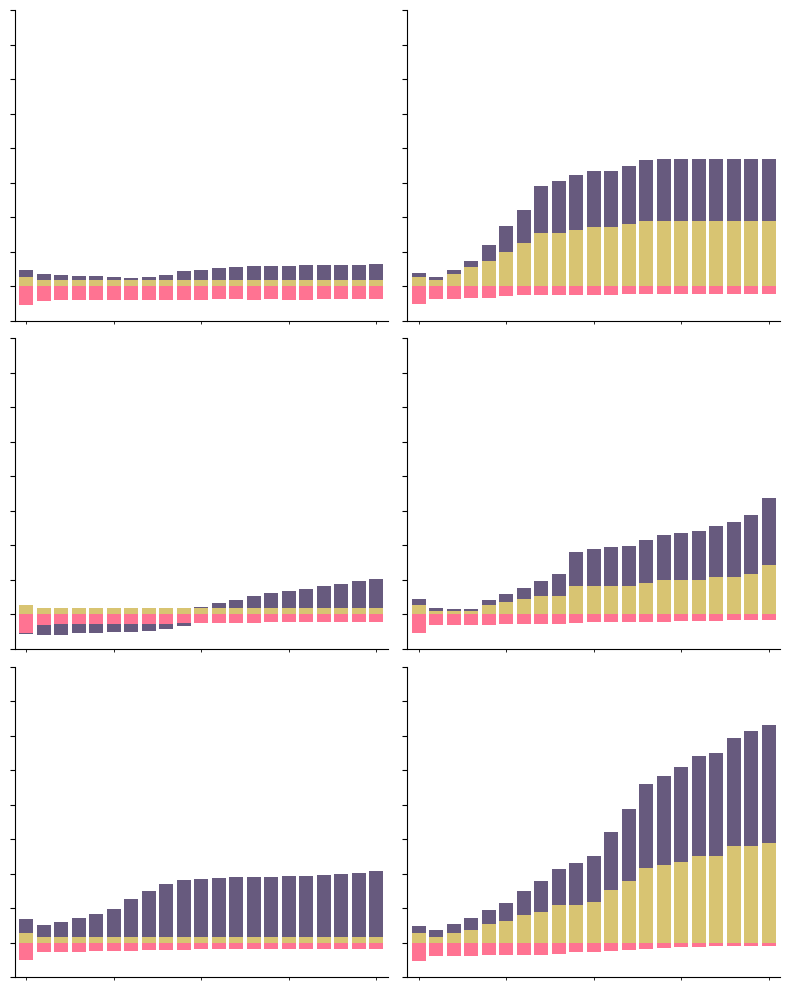

In [14]:
# Create subplots: 3 contagion powers x 2 alpha strategies
from matplotlib import pyplot as plt    

fig, axes = plt.subplots(3, 2, figsize=(8, 10), sharey=True,sharex=True)
deciles_to_plot = deciles[1]
alpha_strategies = ['Difusion', 'Organizacion']

# Filter data for 0.7 decile and ticks

data_ticks_deciles_7 = data_ticks_deciles[
    (data_ticks_deciles["param_contagion_power"] == 3.0) & 
    ((((data_ticks_deciles["tick"] % 5 == 0) | (data_ticks_deciles["tick"] == 1)) & (data_ticks_deciles["tick"] <= 100)))
]


energy_long = pd.melt(
    data_ticks_deciles_7,
    id_vars=['tick', 'decile', 'alpha'],
    value_vars=['energy_from_contagion', 'energy_from_outreach', 'energy_from_decay'],
    var_name='energy_source',
    value_name='energy_value'
)

for col_idx, cp in enumerate(deciles_to_plot):
    for row_idx, alpha_val in enumerate(alpha_strategies):
        ax = axes[col_idx, row_idx]
        
        # Filter data for this combination
        data_filtered = energy_long[
            (energy_long['decile'] == cp) & 
            (energy_long['alpha'] == alpha_val)
        ]
        
        # Pivot to get energy sources as columns for stacking
        data_pivot = data_filtered.pivot_table(
            index='tick', 
            columns='energy_source', 
            values='energy_value',
            aggfunc='mean'
        ).fillna(0)
        column_order = ['energy_from_decay', 'energy_from_outreach', 'energy_from_contagion']
        data_pivot = data_pivot[column_order]

        # Create stacked bar plot
        data_pivot.plot(
            kind='bar',
            stacked=True,
            ax=ax,
            width=0.8,
            alpha=0.7,
            color=[palette_energy[col] for col in column_order]
        )
        
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.legend(title='Energy Source', fontsize=8)
        ax.legend().remove()
        ax.set_ylim(-5,40)
        ax.set_yticklabels([])

        ax.set_xticks([])

# remove legend outside the plots


sns.despine()
fig.tight_layout()

fig.savefig('./figures/energy_gradient_3.0.svg', format='svg', transparent=True)

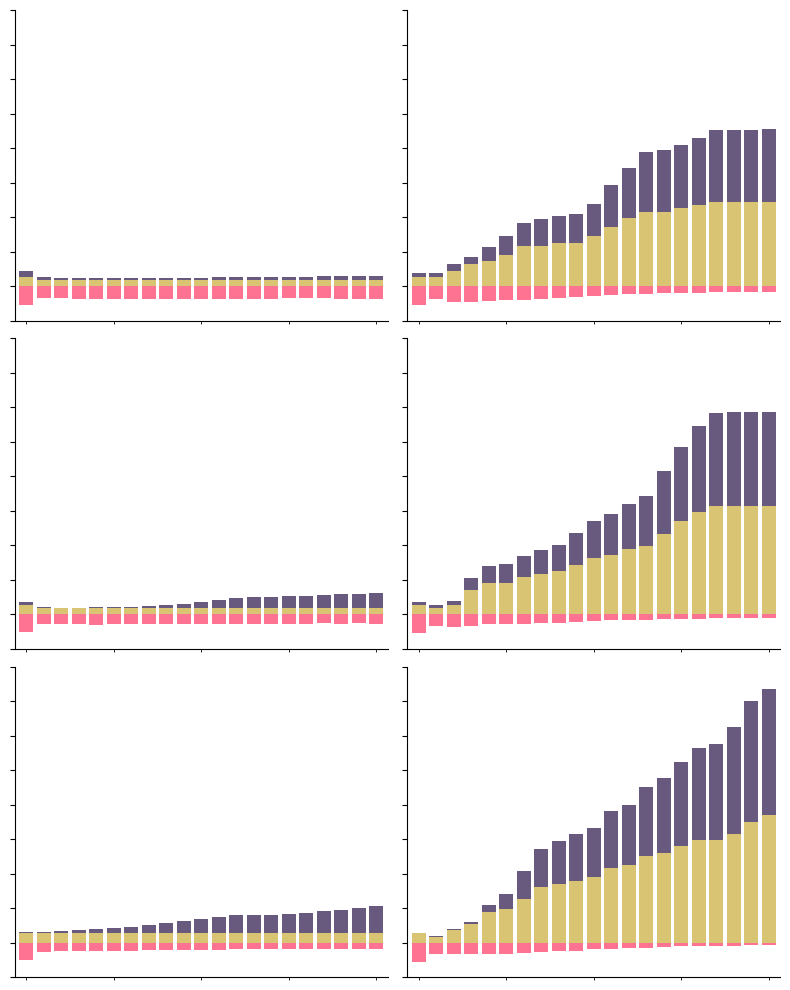

In [7]:
from matplotlib import pyplot as plt    

fig, axes = plt.subplots(3, 2, figsize=(8, 10), sharey=True,sharex=True)
deciles_to_plot = deciles[2]
alpha_strategies = ['Difusion', 'Organizacion']

# Filter data for 0.7 decile and ticks
data_ticks_deciles_7 = data_ticks_deciles[
    (data_ticks_deciles["param_contagion_power"] == 5.0) & 
    ((((data_ticks_deciles["tick"] % 5 == 0) | (data_ticks_deciles["tick"] == 1)) & (data_ticks_deciles["tick"] <= 100)))
]

energy_long = pd.melt(
    data_ticks_deciles_7,
    id_vars=['tick', 'decile', 'alpha'],
    value_vars=['energy_from_contagion', 'energy_from_outreach', 'energy_from_decay'],
    var_name='energy_source',
    value_name='energy_value'
)

for col_idx, cp in enumerate(deciles_to_plot):
    for row_idx, alpha_val in enumerate(alpha_strategies):
        ax = axes[col_idx, row_idx]
        
        # Filter data for this combination
        data_filtered = energy_long[
            (energy_long['decile'] == cp) & 
            (energy_long['alpha'] == alpha_val)
        ]
        
        # Pivot to get energy sources as columns for stacking
        data_pivot = data_filtered.pivot_table(
            index='tick', 
            columns='energy_source', 
            values='energy_value',
            aggfunc='mean'
        ).fillna(0)
        column_order = ['energy_from_decay', 'energy_from_outreach', 'energy_from_contagion']
        data_pivot = data_pivot[column_order]

        # Create stacked bar plot
        data_pivot.plot(
            kind='bar',
            stacked=True,
            ax=ax,
            width=0.8,
            alpha=0.7,
            color=[palette_energy[col] for col in column_order]
        )
        
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_ylim(-5,40)
        ax.set_yticklabels([])

        ax.legend().remove()

        ax.set_xticks([])
# remove legend outside the plots


sns.despine()
plt.tight_layout()
plt.show()

fig.savefig('./figures/energy_gradient_5.0.svg', format='svg', transparent=True)
